In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch


In [5]:
data = pd.read_excel(
    'D://workspace//mathematical_modeling//CUMCM2022//solver//excel//extract//first//附件.xlsx'
)
data2 = pd.get_dummies(data[['data2.iloc[i,16]','类型','data2.iloc[i,14]','data2.iloc[i,15]']])


,苯酚,类黄酮,非类黄酮苯酚,有前花青素,颜色强度,色调
0,3.25,3.17,0.27,2.19,4.90,1.04
1,1.90,0.58,0.63,1.14,7.50,0.67
2,2.48,2.37,0.26,1.46,3.93,1.09
3,2.60,2.90,0.21,1.62,5.85,0.92
4,1.89,1.75,0.45,1.03,2.95,1.45
...,...,...,...,...,...,...
173,3.00,3.25,0.29,2.38,5.70,1.19
174,3.18,5.08,0.47,1.87,6.00,0.93
175,1.74,0.63,0.61,1.55,7.90,0.60
176,3.38,2.14,0.13,1.65,3.21,0.99


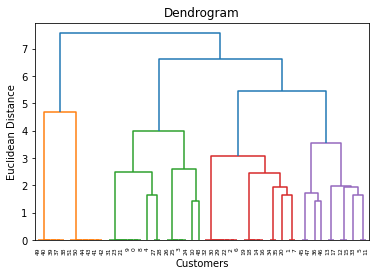

In [10]:
dendrogram = sch.dendrogram(sch.linkage(data2, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.savefig(
    './excel/result/2/level_analysis.png'
)
plt.show()

In [11]:
data.to_excel('./excel/extract/2/dummies.xlsx')

In [11]:
import pandas as pd
import numpy as np


data = pd.read_excel("D:\红酒数据.xlsx")
data

,酒精,苹果酸,灰分,灰的碱性,镁,苯酚,类黄酮,非类黄酮苯酚,有前花青素,颜色强度,色调,稀释的酒的蛋白质浓度的光谱度量,脯氨酸,类型,label
0,14.38,3.59,2.28,16.0,102,3.25,3.17,0.27,2.19,4.90,1.04,3.44,1065,琴酒,0
1,12.45,3.03,2.64,27.0,97,1.90,0.58,0.63,1.14,7.50,0.67,1.73,880,贝尔摩德,1
2,12.85,1.60,2.52,17.8,95,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015,琴酒,0
3,13.74,1.67,2.25,16.4,118,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060,琴酒,0
4,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.95,1.45,2.23,355,雪莉,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285,琴酒,0
174,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465,雪莉,2
175,13.17,5.19,2.32,22.0,93,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725,贝尔摩德,1
176,11.96,1.09,2.30,21.0,101,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886,雪莉,2


In [14]:
x = data.loc[:, '苯酚':'色调']
data_feature_name = x.columns
print(x)
print(x.shape)
y=data.loc[:,'种类']
print(y)
print(y.shape)

       苯酚   类黄酮  非类黄酮苯酚  有前花青素  颜色强度    色调
0    3.25  3.17    0.27   2.19  4.90  1.04
1    1.90  0.58    0.63   1.14  7.50  0.67
2    2.48  2.37    0.26   1.46  3.93  1.09
3    2.60  2.90    0.21   1.62  5.85  0.92
4    1.89  1.75    0.45   1.03  2.95  1.45
..    ...   ...     ...    ...   ...   ...
173  3.00  3.25    0.29   2.38  5.70  1.19
174  3.18  5.08    0.47   1.87  6.00  0.93
175  1.74  0.63    0.61   1.55  7.90  0.60
176  3.38  2.14    0.13   1.65  3.21  0.99
177  3.27  3.39    0.34   1.97  6.75  1.05

[178 rows x 6 columns]
(178, 6)


KeyError: '种类'

(142, 6)
(36, 6)


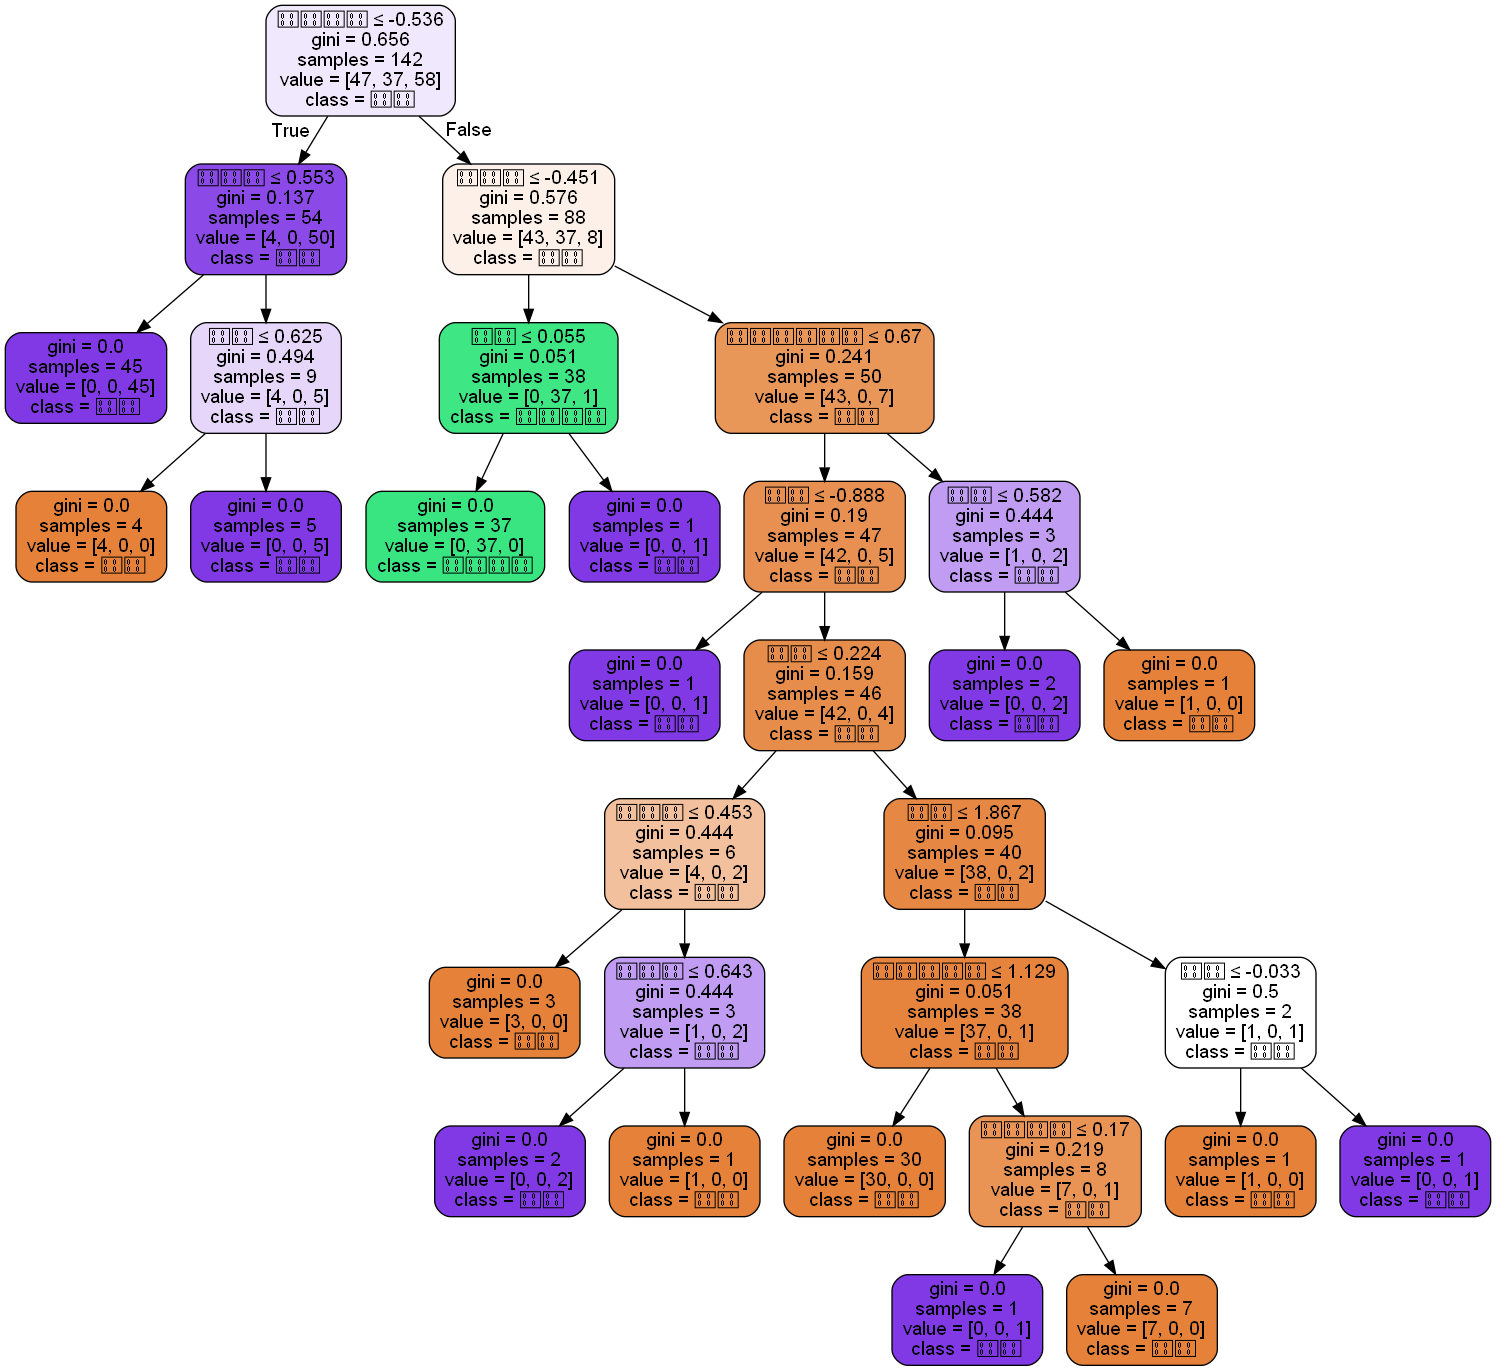

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0,test_size=0.2, train_size=0.8)
'''
X:样本特征集
y:样本标签集
random_state：是随机数的种子。在同一份数据集上，相同的种子产生相同的结果，不同的种子产生不同的划分结果
test_size：样本占比，测试集占数据集的比重，如果是整数的话就是样本的数量
x_train,y_train:构成了训练集
x_test,y_test：构成了测试集
'''

# 接着标准化训练集
# 数据标准化 保证每个维度的特征数据方差为1，均值为0。使得预测结果不会被某些维度过大的特征值而主导。
from sklearn.preprocessing import StandardScaler


tranfer = StandardScaler()
x = tranfer.fit_transform(x)
x_train = tranfer.transform(x_train)
x_test = tranfer.transform(x_test)
# print(x.shape)
print(x_train.shape)
print(x_test.shape)


# 构建决策树模型
from sklearn.tree import DecisionTreeClassifier
# 初始化树模型
model_tree = DecisionTreeClassifier()  # ()里面不填任何属性默认为Gini，里面填写criterion='entropy'使用的是信息熵
# 拟合数据集
model_tree.fit(x_train, y_train)


# 评价模型准确性:使用决策树对测试数据进行类别预测
y_prob = model_tree.predict_proba(x_test)[:,1]
# np.where(condition, x, y)；满足条件(condition)，输出x，不满足输出y。
y_pred = np.where(y_prob > 0.5, 1, 0)
# 预测的精准度
model_tree.score(x_test, y_pred)


# 标签分类
data_target_name = np.unique(data.loc[:,'类型'])


import pydotplus
from sklearn import tree
from IPython.display import Image
import os

# 设置环境变量：因为scikit-learn决策树结果的可视化需要使用到Graphviz
os.environ["PATH"] += os.pathsep + 'D:/'
# 可视化决策树
dot_tree = tree.export_graphviz(model_tree,feature_names=data_feature_name,class_names=data_target_name,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_tree)
img = Image(graph.create_png())
# 输出图片
img

In [ ]:
# length = data.loc[:,'data2.iloc[i,0]':'data2.iloc[i,13]'].shape[0]
for i in range(length):
    F1=-0.183*data2.iloc[i,0]-0.025*data2.iloc[i,1]-0.144*data2.iloc[i,2]-0.058*data2.iloc[i,3]-0.073*data2.iloc[i,4]-0.122*data2.iloc[i,5]-0.091*data2.iloc[i,6]+0.058*data2.iloc[i,7]+0.179*data2.iloc[i,8]+0.158*data2.iloc[i,9]+0.099*data2.iloc[i,10]+0.148*data2.iloc[i,11]-0.043*data2.iloc[i,12]+0.093*data2.iloc[i,13]+0.052*data2.iloc[i,14]+0.113*data2.iloc[i,15]+0.118*data2.iloc[i,16]
    F2=-0.183*data2.iloc[i,0]-0.115*data2.iloc[i,1]+0.153*data2.iloc[i,2]+0.286*data2.iloc[i,3]+0.233*data2.iloc[i,4]+0.153*data2.iloc[i,5]+0.24*data2.iloc[i,6]+0.006*data2.iloc[i,7]+0.088*data2.iloc[i,8]-0.04*data2.iloc[i,9]+0.221*data2.iloc[i,10]+0.101*data2.iloc[i,11]+0.035*data2.iloc[i,12]+0.014*data2.iloc[i,13]+0.063*data2.iloc[i,14]-0.069*data2.iloc[i,15]+0.151*data2.iloc[i,16]
    F3=-0.015*data2.iloc[i,0]+0.022*data2.iloc[i,1]+0.218*data2.iloc[i,2]+0.151*data2.iloc[i,3]-0.181*data2.iloc[i,4]-0.051*data2.iloc[i,5]+0.031*data2.iloc[i,6]+0.377*data2.iloc[i,7]-0.185*data2.iloc[i,8]+0.229*data2.iloc[i,9]-0.077*data2.iloc[i,10]-0.067*data2.iloc[i,11]-0.169*data2.iloc[i,12]+0.239*data2.iloc[i,13]-0.196*data2.iloc[i,14]-0.159*data2.iloc[i,15]+0.109*data2.iloc[i,16]
    F4=0.004*data2.iloc[i,0]-0.062*data2.iloc[i,1]+0.121*data2.iloc[i,2]-0.032*data2.iloc[i,3]-0.154*data2.iloc[i,4]-0.14*data2.iloc[i,5]-0.041*data2.iloc[i,6]-0.093*data2.iloc[i,7]+0.008*data2.iloc[i,8]+0.088*data2.iloc[i,9]-0.202*data2.iloc[i,10]-0.046*data2.iloc[i,11]+0.341*data2.iloc[i,12]+0.054*data2.iloc[i,13]+0.488*data2.iloc[i,14]-0.377*data2.iloc[i,15]+0.225*data2.iloc[i,16]
    F5=0.096*data2.iloc[i,0]-0.51*data2.iloc[i,1]-0.091*data2.iloc[i,2]-0.149*data2.iloc[i,3]+0.095*data2.iloc[i,4]+0.021*data2.iloc[i,5]+0.04*data2.iloc[i,6]+0.122*data2.iloc[i,7]-0.216*data2.iloc[i,8]+0.159*data2.iloc[i,9]+0.232*data2.iloc[i,10]-0.057*data2.iloc[i,11]+0.374*data2.iloc[i,12]+0.348*data2.iloc[i,13]+0.014*data2.iloc[i,14]+0.102*data2.iloc[i,15]-0.346*data2.iloc[i,16]
    F6=-0.101*data2.iloc[i,0]+0.555*data2.iloc[i,1]+0.02*data2.iloc[i,2]-0.09*data2.iloc[i,3]+0.286*data2.iloc[i,4]+0.381*data2.iloc[i,5]-0.147*data2.iloc[i,6]+0.067*data2.iloc[i,7]-0.1*data2.iloc[i,8]+0.266*data2.iloc[i,9]-0.121*data2.iloc[i,10]+0.237*data2.iloc[i,11]+0.35*data2.iloc[i,12]+0.177*data2.iloc[i,13]-0.017*data2.iloc[i,14]+0.036*data2.iloc[i,15]-0.072*data2.iloc[i,16]
    F7=-0.01*data2.iloc[i,0]+0.142*data2.iloc[i,1]+0.209*data2.iloc[i,2]+0.402*data2.iloc[i,3]-0.17*data2.iloc[i,4]-0.016*data2.iloc[i,5]-0.346*data2.iloc[i,6]-0.516*data2.iloc[i,7]-0.026*data2.iloc[i,8]-0.166*data2.iloc[i,9]+0.114*data2.iloc[i,10]-0.317*data2.iloc[i,11]+0.03*data2.iloc[i,12]+0.589*data2.iloc[i,13]+0.011*data2.iloc[i,14]+0.368*data2.iloc[i,15]+0.092*data2.iloc[i,16]

    F=(0.269/0.805)*F1+(0.151/0.805)*F2+(0.116/0.805)*F3+(0.087/0.805)*F4+(0.07/0.805)*F5+(0.066/0.805)*F6+(0.046/0.805)*F7